<a href="https://colab.research.google.com/github/Akif-Mufti/Deep-learning-2.0/blob/master/Linear_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy  as np
import tensorflow as tf
import matplotlib.pyplot as plt 

In [0]:
learning_rate =0.01
epochs =300

In [0]:
sample_points = 50
x_train = np.linspace(0,30,sample_points)
y_train = 6*x_train + 7*np.random.rand(sample_points)

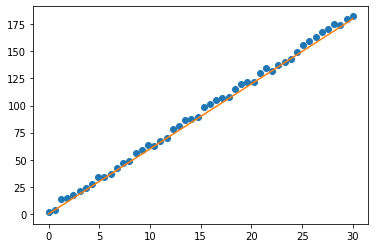

In [11]:
#ploting noisy dataset

plt.plot(x_train,y_train,'o')
#noise free dat
plt.plot(x_train,6*x_train)

plt.show()



Epochs 0.000000 cost 0.027067 Weight 0.698520 Bias 0.559071
Epochs 0.000000 cost 0.084761 Weight 0.698877 Bias 0.559654
Epochs 0.000000 cost 1.614286 Weight 0.701990 Bias 0.562196
Epochs 0.000000 cost 1.598690 Weight 0.706639 Bias 0.564727
Epochs 0.000000 cost 2.229744 Weight 0.713963 Bias 0.567718
Epochs 0.000000 cost 3.440581 Weight 0.725343 Bias 0.571435
Epochs 0.000000 cost 4.157123 Weight 0.740366 Bias 0.575525
Epochs 0.000000 cost 5.627829 Weight 0.760779 Bias 0.580288
Epochs 0.000000 cost 8.544662 Weight 0.789558 Bias 0.586163
Epochs 0.000000 cost 8.365404 Weight 0.821633 Bias 0.591985
Epochs 0.000000 cost 9.656320 Weight 0.859979 Bias 0.598248
Epochs 0.000000 cost 12.763401 Weight 0.908550 Bias 0.605460
Epochs 0.000000 cost 15.329111 Weight 0.966719 Bias 0.613377
Epochs 0.000000 cost 16.047022 Weight 1.031318 Bias 0.621493
Epochs 0.000000 cost 20.973959 Weight 1.111014 Bias 0.630791
Epochs 0.000000 cost 22.031963 Weight 1.198725 Bias 0.640342
Epochs 0.000000 cost 25.388130 Weig

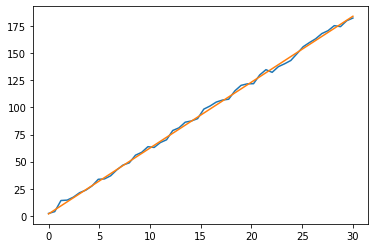

In [15]:
#declaring the placholders and variables
Y = tf.placeholder(tf.float32)
X= tf.placeholder(tf.float32)

W = tf.Variable(np.random.rand(), name = 'Weights')
B = tf.Variable(np.random.rand(), name = 'Bias')

#creating the model for regression

prediction = W*X +B

#cost function

cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

#optimizer 

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_iteration)

#initializing tje variables
init = tf.global_variables_initializer()

#tensor flow sessions

with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for x, y in zip(x_train,y_train):
      sess.run(optimizer, feed_dict = {X:x, Y:y})
      if not epoch%40:
        W1 = sess.run(W)
        B1 = sess.run(B)
        cost_iter = sess.run(cost_iteration, feed_dict = {X:x,Y:y})
        print('Epochs %f cost %f Weight %f Bias %f' %(epoch,cost_iter,W1,B1))

  Weight = sess.run(W)
  Bias = sess.run(B)
  plt.plot(x_train,y_train)
  plt.plot(x_train,Weight*x_train + Bias)
  plt.show()

